In [23]:
import pandas as pd

# Anomaly Detection

In [24]:
df = pd.read_json('anomaly_detection/results/aucs.json')
df = df.drop(index='catch')
df = df.round(3)

#ranks = df.rank(axis=0, method='min', ascending=False)
#mean_ranks = ranks.mean(axis=1)

#df['mean'] = df.mean(axis=1)
#df = df.round(3)
#df['mean_rank'] = mean_ranks
#df.sort_values('mean_rank', inplace=True)
df

,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd
aelstm,0.664,0.998,0.612,0.840,0.618,0.828
anotrans,0.491,0.994,0.553,0.819,0.621,0.678
patchtst,0.696,0.999,0.626,0.843,0.622,0.882
usad,0.669,0.977,0.684,0.255,0.547,0.605
lstm,0.511,0.999,0.595,0.842,0.604,0.833
tranad,0.551,0.967,0.644,0.815,0.581,0.884
patchtrad,0.922,0.999,0.661,0.845,0.660,0.869
patchad,0.972,0.998,0.622,0.822,0.671,0.818
madgan,0.782,0.011,0.460,0.791,0.568,0.708
drocc,0.529,0.886,0.593,0.751,0.705,0.638


In [25]:
df = df.loc[df.index.astype(str).str.contains("jepatchtrad"), :]
ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)

df['mean'] = df.mean(axis=1)
df = df.round(3)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)
df

/tmp/ipykernel_1981213/1686646016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df.mean(axis=1)


,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd,mean,mean_rank
jepatchtrad_base,0.848,0.994,0.630,0.815,0.689,0.859,0.806,1.666667
jepatchtrad_small,0.672,0.995,0.631,0.815,0.645,0.847,0.768,1.833333
jepatchtrad_base_forecast,0.636,0.999,0.623,0.810,0.640,0.838,0.758,2.666667
jepatchtrad_small_forecast,0.367,0.999,0.623,0.809,0.637,0.832,0.711,3.333333


# Forecasting

## Small

In [26]:
df = pd.read_json('forecasting/results/mse_small.json')
df = df.round(4)

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    
    if index_name_split[-1]=="revin":
        index_name_split = [index_name_split[0], index_name_split[-1], index_name_split[1], index_name_split[2]]

    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
df.T

,JEPAtchTST_Revin,PatchTST_Revin,JEPAtchTST_Revin,JEPAtchTST,PatchTST,JEPAtchTST
etth1,0.472,0.5034,0.5249,0.4667,0.507,0.5028
etth2,0.1916,0.1941,0.1971,0.2028,0.2196,0.2659
ettm1_univariate,0.0477,0.047,0.0483,0.0495,0.0558,0.0904
ettm2_univariate,0.1369,0.1496,0.1636,0.1442,0.1628,0.2479
ettm1,0.561,0.6126,0.6691,0.5074,0.5479,0.5564
ettm2,0.1369,0.1375,0.1436,0.1459,0.1501,0.1981
etth1_univariate,0.1192,0.1225,0.1205,0.1317,0.1203,0.158
etth2_univariate,0.2957,0.2973,0.322,0.3153,0.3966,0.3792
exchange_rate,0.0878,0.0849,0.0883,0.2059,0.1932,0.3283
exchange_rate_univariate,0.0972,0.0994,0.0975,0.1695,0.2106,0.2525


## Base

In [27]:
df = pd.read_json('forecasting/results/mse_base.json')
df = df.round(4)

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    
    if index_name_split[-1]=="revin":
        index_name_split = [index_name_split[0], index_name_split[-1], index_name_split[1], index_name_split[2]]

    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
df.T

,JEPAtchTST_Revin,PatchTST_Revin,JEPAtchTST_Revin,JEPAtchTST,PatchTST,JEPAtchTST
etth1,0.4501,0.442,0.4577,0.428,0.449,0.4527
etth2,0.1897,0.1934,0.1886,0.2306,0.2326,0.1938
ettm1,0.406,0.3984,0.417,0.4167,0.4121,0.413
ettm2,0.1179,0.1149,0.1185,0.1228,0.124,0.1445
weather,0.165,0.1655,0.1682,0.1852,0.1813,0.2039
etth1_univariate,0.1073,0.1095,0.1081,0.1315,0.1235,0.1612
etth2_univariate,0.2575,0.2715,0.2544,0.2849,0.316,0.301
ettm1_univariate,0.0457,0.0446,0.0461,0.0489,0.0551,0.0657
ettm2_univariate,0.1162,0.117,0.1241,0.13,0.1419,0.1861
national_illness_univariate,1.1517,2.147,2.3471,4.2762,4.4589,3.692


## Big

In [28]:
df = pd.read_json('forecasting/results/mse_big.json')
df = df.round(4)

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    
    if index_name_split[-1]=="revin":
        index_name_split = [index_name_split[0], index_name_split[-1], index_name_split[1], index_name_split[2]]

    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
df.T

,PatchTST_Revin,JEPAtchTST_Revin,JEPAtchTST_Revin,PatchTST,JEPAtchTST,JEPAtchTST
etth1_univariate,0.1055,0.106,0.1173,0.1243,0.1762,0.2187
etth1,0.461,0.4506,0.7013,0.4674,0.4669,0.9417
etth2,0.1875,0.196,0.2184,0.2167,0.1982,0.4688
etth2_univariate,0.2499,0.2482,0.3363,0.2762,0.294,0.4495
ettm1,0.3856,0.4348,0.7868,0.3982,0.3989,1.0326
ettm1_univariate,0.0453,0.0486,0.0679,0.0567,0.0774,0.388
ettm2,0.1198,0.1257,0.1718,0.1252,0.1244,0.7619
ettm2_univariate,0.117,0.1211,0.2083,0.1336,0.1389,0.642
exchange_rate,0.0981,0.0896,0.1126,0.2295,0.1403,0.9797
exchange_rate_univariate,0.1234,0.1234,0.1431,0.1836,0.6855,0.9415


## Overall

In [29]:
small = pd.read_json('forecasting/results/mse_small.json')
small = small.round(4)
small.index = small.index + "_small"

base = pd.read_json('forecasting/results/mse_base.json')
base = base.round(4)
base.index = base.index + "_base"

big = pd.read_json('forecasting/results/mse_big.json')
big = big.round(4)
big.index = big.index + "_big"

df = pd.concat([small, base, big], axis=0)

In [30]:
df = df.loc[:, df.columns.astype(str).str.contains("univariate")==True]
ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df.T

,JePatchTST_True_True_revin_big,JePatchTST_False_False_revin_base,JePatchTST_True_True_revin_base,JePatchTST_True_False_revin_base,JePatchTST_False_False_revin_big,JePatchTST_False_False_revin_small,JePatchTST_True_True_revin_small,JePatchTST_True_False_revin_small,JePatchTST_True_False_revin_big,JePatchTST_False_False_base,JePatchTST_True_True_big,JePatchTST_True_True_base,JePatchTST_False_False_small,JePatchTST_True_True_small,JePatchTST_True_False_base,JePatchTST_False_False_big,JePatchTST_True_False_small,JePatchTST_True_False_big
ettm1_univariate,0.045300,0.045700,0.044600,0.046100,0.048600,0.0477,0.047000,0.0483,0.067900,0.048900,0.056700,0.055100,0.0495,0.055800,0.065700,0.077400,0.0904,0.388000
ettm2_univariate,0.117000,0.116200,0.117000,0.124100,0.121100,0.1369,0.149600,0.1636,0.208300,0.130000,0.133600,0.141900,0.1442,0.162800,0.186100,0.138900,0.2479,0.642000
etth1_univariate,0.105500,0.107300,0.109500,0.108100,0.106000,0.1192,0.122500,0.1205,0.117300,0.131500,0.124300,0.123500,0.1317,0.120300,0.161200,0.176200,0.1580,0.218700
etth2_univariate,0.249900,0.257500,0.271500,0.254400,0.248200,0.2957,0.297300,0.3220,0.336300,0.284900,0.276200,0.316000,0.3153,0.396600,0.301000,0.294000,0.3792,0.449500
exchange_rate_univariate,0.123400,0.134900,0.119800,0.112700,0.123400,0.0972,0.099400,0.0975,0.143100,0.198200,0.183600,0.235600,0.1695,0.210600,0.513900,0.685500,0.2525,0.941500
weather_univariate,0.001400,0.001400,0.001400,0.001400,0.001400,0.0014,0.001400,0.0014,0.001300,0.005300,0.005800,0.005900,0.0060,0.005800,0.005700,0.005900,0.0058,0.005800
national_illness_univariate,2.610300,1.151700,2.147000,2.347100,2.474500,1.0655,1.422200,1.0644,2.269300,4.276200,4.452100,4.458900,4.6863,4.712100,3.692000,4.225200,4.4047,4.772600
mean_rank,3.428571,3.428571,3.571429,4.142857,4.428571,5.0000,6.571429,7.0000,9.714286,9.857143,10.714286,12.857143,13.0000,13.142857,13.285714,13.428571,15.0000,17.142857


# Classification

### Artificial Signals

In [31]:
small = pd.read_json('classification/type1/results/small/accs.json')
base = pd.read_json('classification/type1/results/base/accs.json')
big = pd.read_json('classification/type1/results/big/accs.json')

small.columns = ['small']
base.columns = ['base']
big.columns = ['big']

name_map = {
    "JePatchTST_True_True": "scratch",
    "JePatchTST_True_False": "freeze",
    "JePatchTST_False_False": "finetune"
}

df = pd.concat([small, base, big], axis=1)
df = df.rename(index=name_map)
df = df.round(3)
df.T

,scratch,freeze,finetune
small,0.653,0.767,0.853
base,0.740,0.800,0.907
big,0.713,0.820,0.887


## True Signals

In [32]:
small = pd.read_json('classification/type2/results/small/accs.json')
base = pd.read_json('classification/type2/results/base/accs.json')
big = pd.read_json('classification/type2/results/big/accs.json')

small.columns = ['small']
base.columns = ['base']
big.columns = ['big']

name_map = {
    "JePatchTST_True_True": "scratch",
    "JePatchTST_True_False": "freeze",
    "JePatchTST_False_False": "finetune"
}

df = pd.concat([small, base, big], axis=1)
df = df.rename(index=name_map)
df = df.round(3)
df.T

,scratch,freeze,finetune
small,0.444,0.687,0.823
base,0.554,0.773,0.897
big,0.647,0.716,0.881


## Forecasting varying sizes

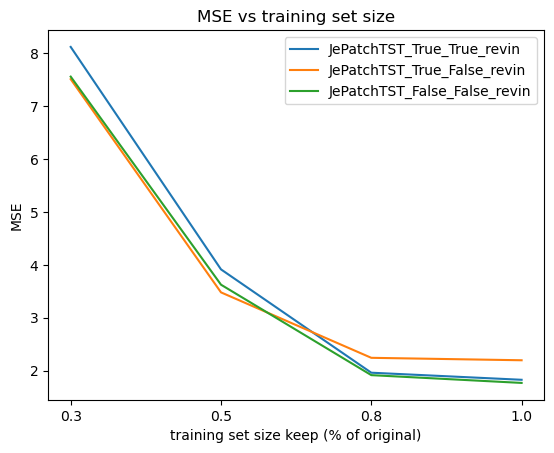

In [39]:
df = pd.read_json('forecasting/results/mse_vary.json')

DATASET="national_illness"
cols = df.columns.astype(str).str.contains(DATASET)==True
df = df.loc[:, cols]


df.columns = df.columns.str.replace(DATASET, "")

import matplotlib.pyplot as plt

for model in df.index:
    plt.plot(df.columns, df.loc[model], label=model)
plt.xlabel('training set size keep (% of original)')
plt.ylabel('MSE')
plt.title('MSE vs training set size')
plt.legend()